In [62]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

from matplotlib.patches import Rectangle
from PIL import Image
from torchvision.transforms import v2


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

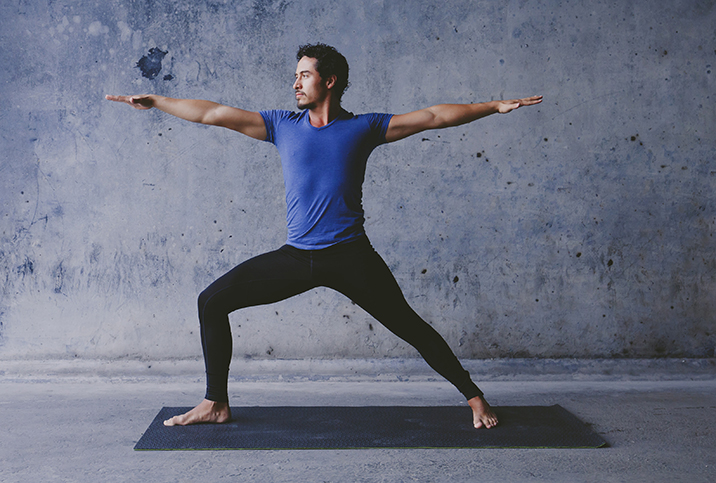

In [63]:
image = Image.open("./data/eksperimen-3/test/warrior2/custom101.jpg")

image

In [64]:
# SVGA graph visualization function for a single node and its connections
def visualize_svga_graph(image, patch_size, k, node_index):
    # Convert image tensor to numpy array
    image_np = image.cpu().squeeze().permute(1, 2, 0).numpy()

    # Plot the image
    fig, ax = plt.subplots()
    ax.imshow(image_np)

    img_height, img_width, _ = image_np.shape
    num_patches_row = img_width // patch_size
    num_patches_col = img_height // patch_size

    # Get the coordinates of the main node
    main_x, main_y = patch_index_to_coords(node_index, patch_size, img_width)

    # Draw connections to every kth pixel in the row and column
    for offset in range(k, max(num_patches_row, num_patches_col), k):
        # Right row connection
        if (node_index % num_patches_row) + offset < num_patches_row:
            connected_index = node_index + offset
            nx, ny = patch_index_to_coords(connected_index, patch_size, img_width)
            # Draw line in green
            connection = patches.FancyArrowPatch(
                (main_y + patch_size / 2, main_x + patch_size / 2),
                (ny + patch_size / 2, nx + patch_size / 2),
                connectionstyle="arc3,rad=.5",
                color="g",
                arrowstyle="-",
            )
            ax.add_patch(connection)
            # Draw connected node in blue
            connected_rect = Rectangle(
                (ny, nx),
                patch_size,
                patch_size,
                linewidth=1,
                edgecolor="b",
                facecolor="none",
            )
            ax.add_patch(connected_rect)

        # Left row connection
        if (node_index % num_patches_row) - offset >= 0:
            connected_index = node_index - offset
            nx, ny = patch_index_to_coords(connected_index, patch_size, img_width)
            # Draw line in green
            connection = patches.FancyArrowPatch(
                (main_y + patch_size / 2, main_x + patch_size / 2),
                (ny + patch_size / 2, nx + patch_size / 2),
                connectionstyle="arc3,rad=-.5",
                color="g",
                arrowstyle="-",
            )
            ax.add_patch(connection)
            # Draw connected node in blue
            connected_rect = Rectangle(
                (ny, nx),
                patch_size,
                patch_size,
                linewidth=1,
                edgecolor="b",
                facecolor="none",
            )
            ax.add_patch(connected_rect)

        # Down column connection
        if (node_index // num_patches_row) + offset < num_patches_col:
            connected_index = node_index + (offset * num_patches_row)
            nx, ny = patch_index_to_coords(connected_index, patch_size, img_width)
            # Draw line in green
            connection = patches.FancyArrowPatch(
                (main_y + patch_size / 2, main_x + patch_size / 2),
                (ny + patch_size / 2, nx + patch_size / 2),
                connectionstyle="arc3,rad=.5",
                color="g",
                arrowstyle="-",
            )
            ax.add_patch(connection)
            # Draw connected node in blue
            connected_rect = Rectangle(
                (ny, nx),
                patch_size,
                patch_size,
                linewidth=1,
                edgecolor="b",
                facecolor="none",
            )
            ax.add_patch(connected_rect)

        # Up column connection
        if (node_index // num_patches_row) - offset >= 0:
            connected_index = node_index - (offset * num_patches_row)
            nx, ny = patch_index_to_coords(connected_index, patch_size, img_width)
            # Draw line in green
            connection = patches.FancyArrowPatch(
                (main_y + patch_size / 2, main_x + patch_size / 2),
                (ny + patch_size / 2, nx + patch_size / 2),
                connectionstyle="arc3,rad=-.5",
                color="g",
                arrowstyle="-",
            )
            ax.add_patch(connection)
            # Draw connected node in blue
            connected_rect = Rectangle(
                (ny, nx),
                patch_size,
                patch_size,
                linewidth=1,
                edgecolor="b",
                facecolor="none",
            )
            ax.add_patch(connected_rect)

    # Draw the main node in red
    main_rect = Rectangle(
        (main_y, main_x),
        patch_size,
        patch_size,
        linewidth=1,
        edgecolor="r",
        facecolor="none",
    )
    ax.add_patch(main_rect)
    plt.show()


# Helper function to convert patch index to coordinates
def patch_index_to_coords(index, patch_size, img_width):
    num_patches_per_row = img_width // patch_size
    row = index // num_patches_per_row
    col = index % num_patches_per_row
    return row * patch_size, col * patch_size


In [65]:
# Preprocess the image
preprocess = v2.Compose(
    [
        v2.ToImage(),
        v2.Resize((224, 224)),  # Resize to 224x224
        v2.ToDtype(torch.float32, scale=True),
    ]
)
image_tensor = preprocess(image).unsqueeze(dim=0).to(device)


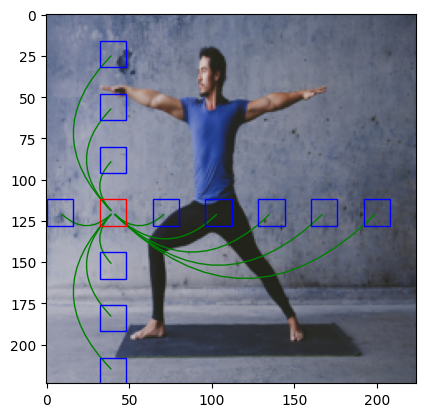

In [66]:
# Parameters
patch_size = 16  # Example patch size
k = 2  # Number of connections for SVGA graph
node_index = 100  # Example node index to visualize

# Visualize the single node with its SVGA connections
visualize_svga_graph(image_tensor, patch_size, k, node_index)
